In [1]:
pwd


'D:\\Fold1\\Data Science Learning\\13-Logistic-Regression'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
dataset=pd.read_csv('titanic_train.csv')

In [6]:
dataset.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


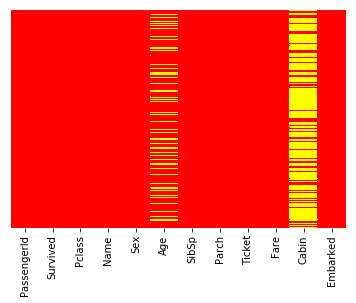

In [10]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='autumn')
#yellow bars represent the data where we have Nan

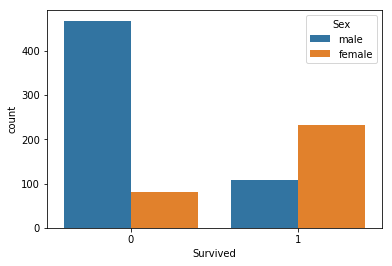

In [15]:
sns.countplot(x='Survived',data=dataset,hue='Sex')
#Gives the count of the people who survived and not survived and hue divides the count b/w genders.

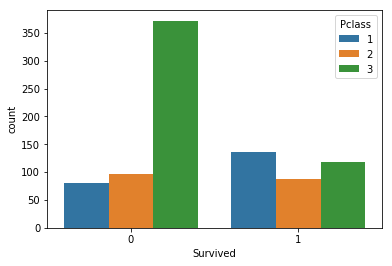

In [20]:
#Also checking for which class people survived and didnt survive
sns.countplot(x='Survived',data=dataset,hue='Pclass')

C:\Users\Teja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


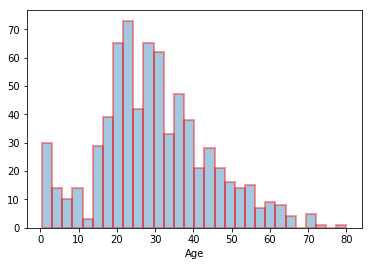

In [32]:
sns.distplot(dataset['Age'].dropna(),kde=False,bins=30, hist_kws=dict(edgecolor="r", linewidth=2))

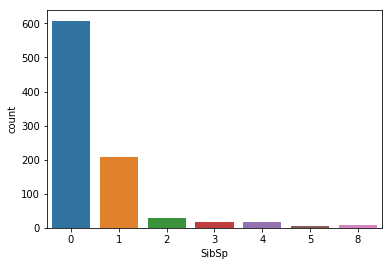

In [34]:
sns.countplot(x='SibSp',data=dataset)

In [35]:
import cufflinks as cf

In [37]:
cf.go_offline()

In [41]:
dataset['Fare'].iplot(kind='hist',bins=20)

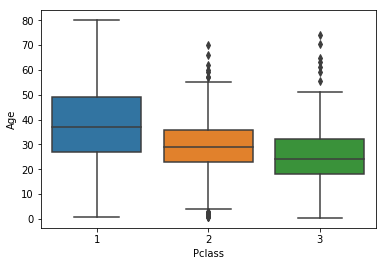

In [48]:
sns.boxplot(x="Pclass",y="Age",data=dataset)


In [75]:
round(dataset[dataset['Pclass']==2]['Age'].mean()) #verify the mean for different classes


30

In [74]:
#Imputing missing data
def impute_vals(cols):
    impval=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if(pclass==1):
            return 38
        elif pclass==2:
            return 30
        else:
            return 25
    else:
        return age

In [68]:
dataset['Age']=dataset[['Age','Pclass']].apply(impute_vals,axis=1)

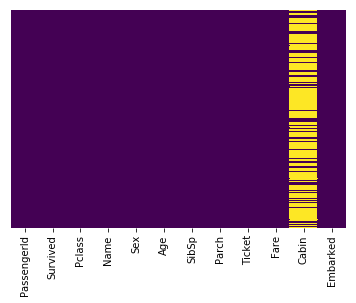

In [71]:
#check for null values in age
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [76]:
dataset[dataset['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [82]:
dataset.drop('Cabin',axis=1,inplace=True)

In [84]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [86]:
dataset.dropna(inplace=True)

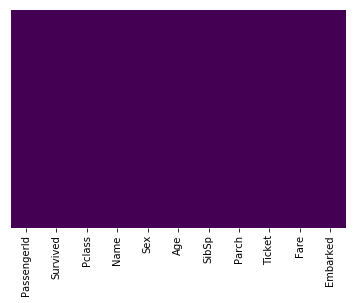

In [88]:
#check for null values
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [91]:
#Creating dummy variables for categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [98]:
#for sex col
dataset.iloc[:,4]=labelencoder.fit_transform(dataset.iloc[:,4])

In [101]:
#for Embarked col
dataset.iloc[:,10]=labelencoder.fit_transform(dataset.iloc[:,10])
#dataset['Embarked'].value_counts()

In [124]:
dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.00,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.00,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,25.0,1,2,W./C. 6607,23.45,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.00,0
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.75,1


In [114]:
X=dataset.drop(['Survived','Name','Ticket'],axis=1)
y=dataset['Survived']
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2


In [125]:
#split into train and test data
from sklearn.cross_validation import train_test_split
y.tail()

886    0
887    1
888    0
889    1
890    0
Name: Survived, dtype: int64

In [115]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [110]:
from sklearn.linear_model import LogisticRegression

In [112]:
logmodel=LogisticRegression()

In [117]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [131]:
X_train.count()

PassengerId    595
Pclass         595
Sex            595
Age            595
SibSp          595
Parch          595
Fare           595
Embarked       595
dtype: int64

In [120]:
predictions=logmodel.predict(X_test)


In [134]:
from sklearn.metrics import confusion_matrix
294+595

889

In [132]:
confusion_matrix(y_test,predictions)

array([[161,  23],
       [ 30,  80]], dtype=int64)

In [135]:
X_test.count()

PassengerId    294
Pclass         294
Sex            294
Age            294
SibSp          294
Parch          294
Fare           294
Embarked       294
dtype: int64

In [139]:
from sklearn.metrics import classification_report
#precsion: How often your predictions for positive class are true

In [138]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.84      0.88      0.86       184
          1       0.78      0.73      0.75       110

avg / total       0.82      0.82      0.82       294

